In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [19]:
maxwalk = pd.read_csv("data/maxwalk.csv")
maxchair = pd.read_csv("data/maxchair.csv")
maxchair.shape, maxwalk.shape

((10359, 11), (1361, 11))

In [20]:
maxchair.columns, maxwalk.columns

(Index(['mergeid', 'age', 'bmi', 'female', 'educational_level', 'OA_conserv',
        'Hypertension', 'Diabetes', 'maxgrip', 'chair', 'disease_category'],
       dtype='object'),
 Index(['mergeid', 'age', 'bmi', 'female', 'educational_level', 'OA_conserv',
        'Hypertension', 'Diabetes', 'maxgrip', 'walking', 'disease_category'],
       dtype='object'))

#### Tukey HSD Post-hoc Test (Table or Heatmap)

In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def run_tukey_test(df, outcome):
    tukey = pairwise_tukeyhsd(endog=df[outcome], groups=df['disease_category'], alpha=0.05)
    print(tukey.summary())


In [22]:
# MaxChair
run_tukey_test(maxchair, 'maxgrip')
run_tukey_test(maxchair, 'chair')

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
      group1           group2    meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------------
All three diseases   HT and Diab   4.7938 0.0077  0.7558  8.8318   True
All three diseases    No disease   6.4219    0.0  2.7524 10.0914   True
All three diseases   OA and Diab   1.6516   0.99 -4.2297  7.5329  False
All three diseases     OA and HT   0.9421 0.9963 -3.0012  4.8855  False
All three diseases Only Diabetes   6.2111 0.0001  2.0721 10.3501   True
All three diseases       Only HT   6.0537    0.0  2.3379  9.7695   True
All three diseases       Only OA   1.9848 0.7745 -1.8733   5.843  False
       HT and Diab    No disease   1.6281 0.1098 -0.1708   3.427  False
       HT and Diab   OA and Diab  -3.1422 0.5301 -8.0779  1.7934  False
       HT and Diab     OA and HT  -3.8517    0.0 -6.1585 -1.5448   True
       HT and Diab Only Diabetes   1.4173 0.7288   -1.21  4.0446

In [23]:
# MaxWalk
run_tukey_test(maxwalk, 'maxgrip')
run_tukey_test(maxwalk, 'walking')

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
      group1           group2    meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------------
All three diseases   HT and Diab   1.6842 0.9845 -3.8932  7.2616  False
All three diseases    No disease   4.9136 0.0367  0.1629  9.6643   True
All three diseases   OA and Diab   1.9759 0.9924 -5.3903  9.3421  False
All three diseases     OA and HT   2.2056 0.9101 -3.0695  7.4806  False
All three diseases Only Diabetes   2.4943 0.8761 -3.0831  8.0717  False
All three diseases       Only HT   3.1868  0.472 -1.6143  7.9879  False
All three diseases       Only OA    -0.09    1.0 -5.3284  5.1484  False
       HT and Diab    No disease   3.2294 0.0796 -0.1865  6.6453  False
       HT and Diab   OA and Diab   0.2917    1.0 -6.2931  6.8765  False
       HT and Diab     OA and HT   0.5214 0.9999 -3.5926  4.6354  False
       HT and Diab Only Diabetes   0.8101 0.9994  -3.685  5.3053

##### Sample distribution by disease group

In [24]:
def plot_combined_sample_distribution_percent(maxchair, maxwalk):

    chair_pct = maxchair['disease_category'].value_counts(normalize=True) * 100
    walk_pct = maxwalk['disease_category'].value_counts(normalize=True) * 100

    combined_df = pd.DataFrame({
        'Disease Group': chair_pct.index.tolist() + walk_pct.index.tolist(),
        'Percentage': list(chair_pct.values) + list(walk_pct.values),
        'Age Group': ['Age < 75'] * len(chair_pct) + ['Age ≥ 75'] * len(walk_pct)  # renamed here
    })

    custom_order = [
        'No disease', 'Only OA', 'Only HT', 'Only Diabetes',
        'OA and HT', 'OA and Diab', 'HT and Diab', 'All three diseases'
    ]

    combined_df['Disease Group'] = pd.Categorical(
        combined_df['Disease Group'],
        categories=custom_order,
        ordered=True
    )

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=combined_df,
        x='Disease Group',
        y='Percentage',
        hue='Age Group',
        palette={'Age < 75': 'lightblue', 'Age ≥ 75': 'lightpink'}
    )

    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3, fontsize=9)

    plt.title('Percentage of participants by disease group in adults aged <75 and ≥75 years')
    plt.ylabel('Percentage (%)')
    plt.xlabel('Disease Group')
    plt.xticks(rotation=45)
    plt.legend(title='Age Group')
    plt.tight_layout()
    plt.show()


/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


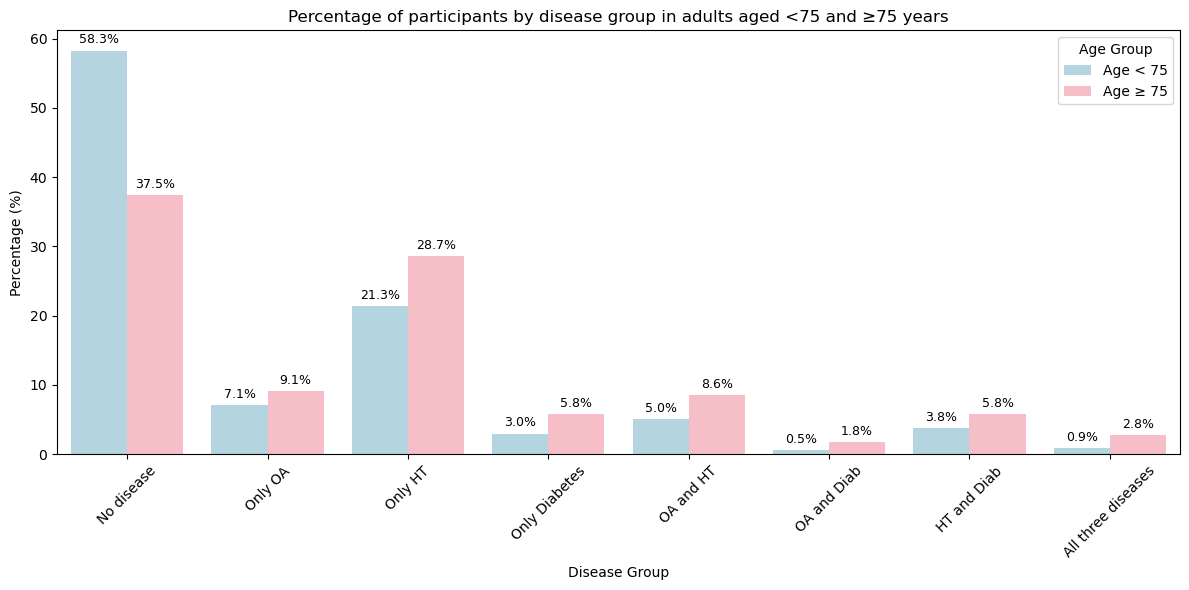

In [25]:
plot_combined_sample_distribution_percent(maxchair, maxwalk)

##### Grip Strength (kg) 

In [26]:
shared_palette = {
    'Grip Strength (<75)': 'dodgerblue',
    'Grip Strength (≥75)': 'orangered',
    'Chair Stand (sec) for adults <75': 'dodgerblue',
    'Walking Speed (sec) for adults ≥75': 'orangered'
}

In [27]:
def plot_combined_grip_strength(maxchair, maxwalk):
    grip_df_chair = maxchair[['disease_category', 'maxgrip']].copy()
    grip_df_chair['Outcome'] = 'Grip Strength (<75)'

    grip_df_walk = maxwalk[['disease_category', 'maxgrip']].copy()
    grip_df_walk['Outcome'] = 'Grip Strength (≥75)'

    combined_grip = pd.concat([grip_df_chair, grip_df_walk], ignore_index=True)
    combined_grip = combined_grip.rename(columns={'maxgrip': 'Grip Strength (kg)'})

    plt.figure(figsize=(13, 6))
    sns.boxplot(data=combined_grip, x='disease_category', y='Grip Strength (kg)', hue='Outcome', palette=shared_palette)
    plt.title('Grip Strength (kg) by Disease Group')
    plt.xticks(rotation=45)
    plt.xlabel('Disease Group')
    plt.ylabel('Grip Strength (kg)')
    plt.legend(title='Outcome')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

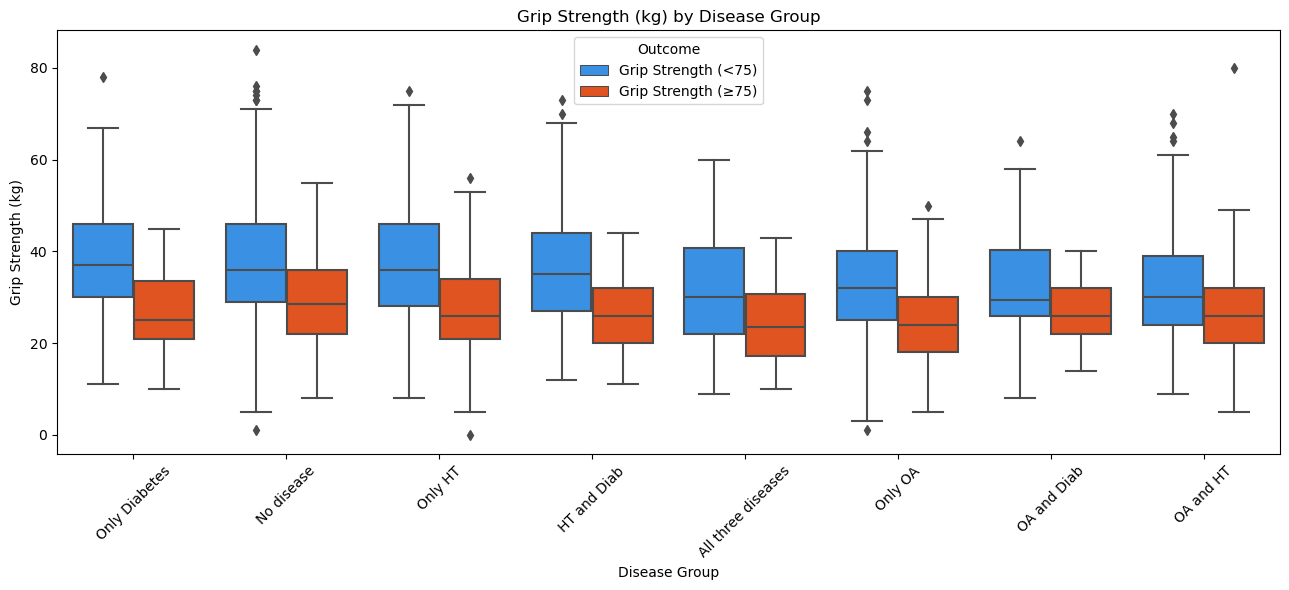

In [28]:
plot_combined_grip_strength(maxchair, maxwalk)

##### Chair Stand & Walking Speed (sec) 

In [29]:

def plot_combined_mobility(maxchair, maxwalk):
    chair_df = maxchair[['disease_category', 'chair']].copy()
    chair_df['Outcome'] = 'Chair Stand (sec) for adults <75'
    chair_df = chair_df.rename(columns={'chair': 'Value'})

    walk_df = maxwalk[['disease_category', 'walking']].copy()
    walk_df['Outcome'] = 'Walking Speed (sec) for adults ≥75'
    walk_df = walk_df.rename(columns={'walking': 'Value'})

    combined_mobility = pd.concat([chair_df, walk_df], ignore_index=True)

    plt.figure(figsize=(13, 6))
    sns.boxplot(data=combined_mobility, x='disease_category', y='Value', hue='Outcome')
    plt.title('Chair Stand and Walking Speed by Disease Group')
    plt.xticks(rotation=45)
    plt.xlabel('Disease Group')
    plt.ylabel('Time (seconds)')
    plt.legend(title='Outcome')    
    plt.grid(False) 
    plt.tight_layout()
    plt.show()

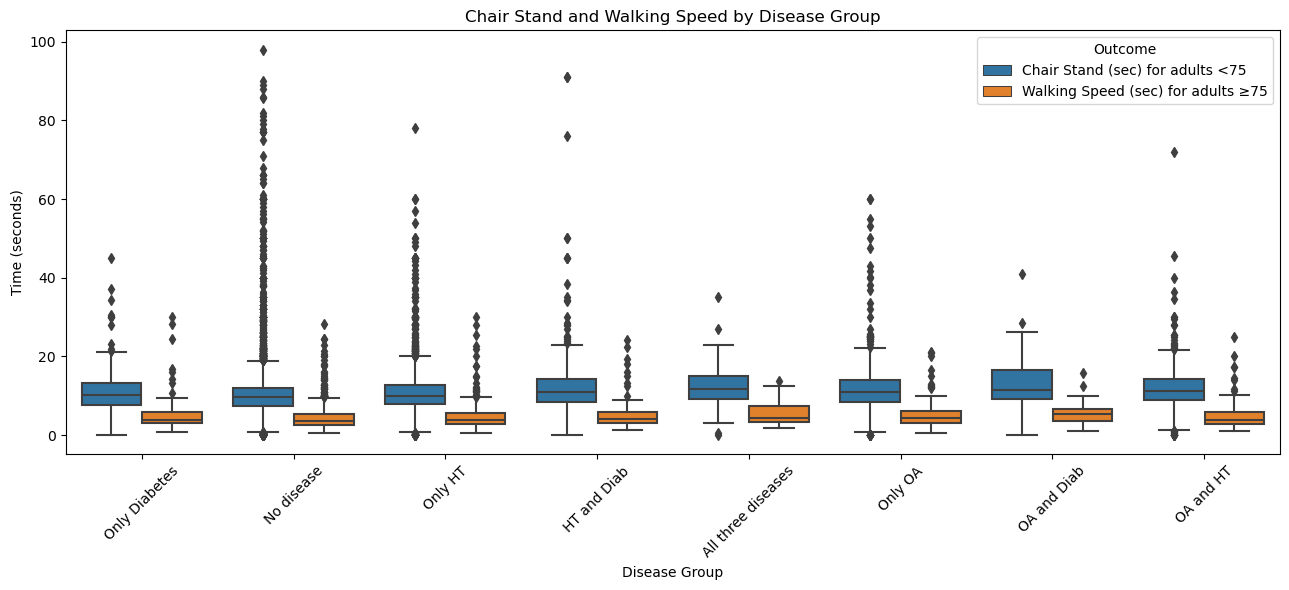

In [30]:
plot_combined_mobility(maxchair, maxwalk)

##### Regression maxgrip min under 75 and uper 75

In [31]:


def plot_grip_strength_regression(maxchair, maxwalk):
    # for adults <75
    model1 = smf.ols('maxgrip ~ C(disease_category) + age + bmi + female + educational_level', data=maxchair).fit()
    df1 = pd.DataFrame({
        'predictor': model1.params.index,
        'coef': model1.params.values,
        'ci_lower': model1.conf_int().iloc[:, 0],
        'ci_upper': model1.conf_int().iloc[:, 1],
        'Outcome': 'Grip Strength (<75)'
    })

    # for adults ≥75
    model2 = smf.ols('maxgrip ~ C(disease_category) + age + bmi + female + educational_level', data=maxwalk).fit()
    df2 = pd.DataFrame({
        'predictor': model2.params.index,
        'coef': model2.params.values,
        'ci_lower': model2.conf_int().iloc[:, 0],
        'ci_upper': model2.conf_int().iloc[:, 1],
        'Outcome': 'Grip Strength (≥75)'
    })


    all_df = pd.concat([df1, df2])
    all_df = all_df[~all_df['predictor'].isin(['Intercept', 'age', 'bmi', 'female', 'educational_level'])]
    all_df['predictor'] = all_df['predictor'].str.replace(r'C\(disease_category\)\[T\.', '', regex=True).str.rstrip(']')
    all_df['predictor'] = all_df['predictor'].astype(str)


    palette = {
        'Grip Strength (<75)': '#1f77b4',  
        'Grip Strength (≥75)': '#d62728'  
    }


    plt.figure(figsize=(10, 6))
    sns.pointplot(
        data=all_df, x='coef', y='predictor', hue='Outcome',
        palette=palette, dodge=0.5, join=False, markers='o'
    )

    
    for _, row in all_df.iterrows():
        color = palette[row['Outcome']]
        plt.plot([row['ci_lower'], row['ci_upper']], [row['predictor'], row['predictor']],
                 color=color, linewidth=2, alpha=0.7)

    plt.axvline(0, color='red', linestyle='--')
    plt.title("Adjusted Regression Coefficients for Grip Strength by Disease Group")
    plt.xlabel("Coefficient Estimate")
    plt.ylabel("Disease Groups")
    plt.legend(title="Outcome")
    plt.tight_layout()
    plt.show()
    
    return all_df



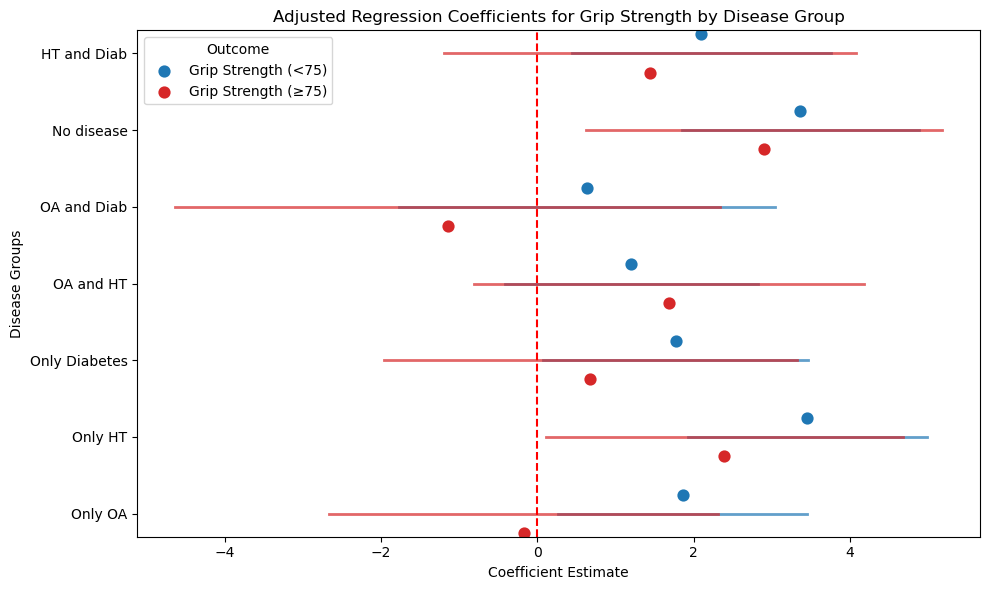

                                          predictor      coef  ci_lower  \
C(disease_category)[T.HT and Diab]      HT and Diab  2.100125  0.446437   
C(disease_category)[T.No disease]        No disease  3.367116  1.848163   
C(disease_category)[T.OA and Diab]      OA and Diab  0.639987 -1.767427   
C(disease_category)[T.OA and HT]          OA and HT  1.205778 -0.411311   
C(disease_category)[T.Only Diabetes]  Only Diabetes  1.769503  0.068676   
C(disease_category)[T.Only HT]              Only HT  3.457952  1.930812   
C(disease_category)[T.Only OA]              Only OA  1.859315  0.268130   
C(disease_category)[T.HT and Diab]      HT and Diab  1.440299 -1.195473   
C(disease_category)[T.No disease]        No disease  2.901796  0.627416   
C(disease_category)[T.OA and Diab]      OA and Diab -1.145091 -4.629968   
C(disease_category)[T.OA and HT]          OA and HT  1.684603 -0.810626   
C(disease_category)[T.Only Diabetes]  Only Diabetes  0.680262 -1.962285   
C(disease_category)[T.Onl

In [32]:
df = plot_grip_strength_regression(maxchair, maxwalk)
print(df)


##### Regression maxchair maxwalk (in the paper Fig6)

In [33]:
def plot_mobility_regression_coeffs_fixed(maxchair, maxwalk):


    model_chair = smf.ols('chair ~ C(disease_category) + age + bmi + female + educational_level', data=maxchair).fit()
    model_walk = smf.ols('walking ~ C(disease_category) + age + bmi + female + educational_level', data=maxwalk).fit()

    # Chair Stand (<75)
    df_chair = pd.DataFrame({
        'predictor': model_chair.params.index,
        'coef': model_chair.params.values,
        'ci_lower': model_chair.conf_int().iloc[:, 0],
        'ci_upper': model_chair.conf_int().iloc[:, 1],
        'Outcome': 'Chair Stand (<75)'  
    })

    # Walking Speed (≥75)
    df_walk = pd.DataFrame({
        'predictor': model_walk.params.index,
        'coef': model_walk.params.values,
        'ci_lower': model_walk.conf_int().iloc[:, 0],
        'ci_upper': model_walk.conf_int().iloc[:, 1],
        'Outcome': 'Walking Speed (≥75)'  
    })

    results = pd.concat([df_chair, df_walk])
    results = results[~results['predictor'].isin(['Intercept', 'age', 'bmi', 'female', 'educational_level'])]
    results['predictor'] = results['predictor'].str.replace(r'C\(disease_category\)\[T\.', '', regex=True).str.rstrip(']')

    palette = {
        'Chair Stand (<75)': '#1f77b4',      
        'Walking Speed (≥75)': '#d62728',    
    }


    plt.figure(figsize=(10, 6))
    sns.pointplot(
        data=results,
        x='coef',
        y='predictor',
        hue='Outcome',
        palette=palette,
        dodge=0.5,
        join=False
    )


    for i, row in results.iterrows():
        plt.plot(
            [row['ci_lower'], row['ci_upper']],
            [row['predictor'], row['predictor']],
            color=palette[row['Outcome']],
            linewidth=1.5,
            alpha=0.8
        )

    plt.axvline(0, color='black', linestyle='--')
    plt.title("Adjusted Regression Coefficients for Mobility Outcomes by Disease Group")
    plt.xlabel("Coefficient Estimate")
    plt.ylabel("Disease Groups")
    plt.legend(title="Outcome")
    plt.tight_layout()
    plt.show()
    
    return results


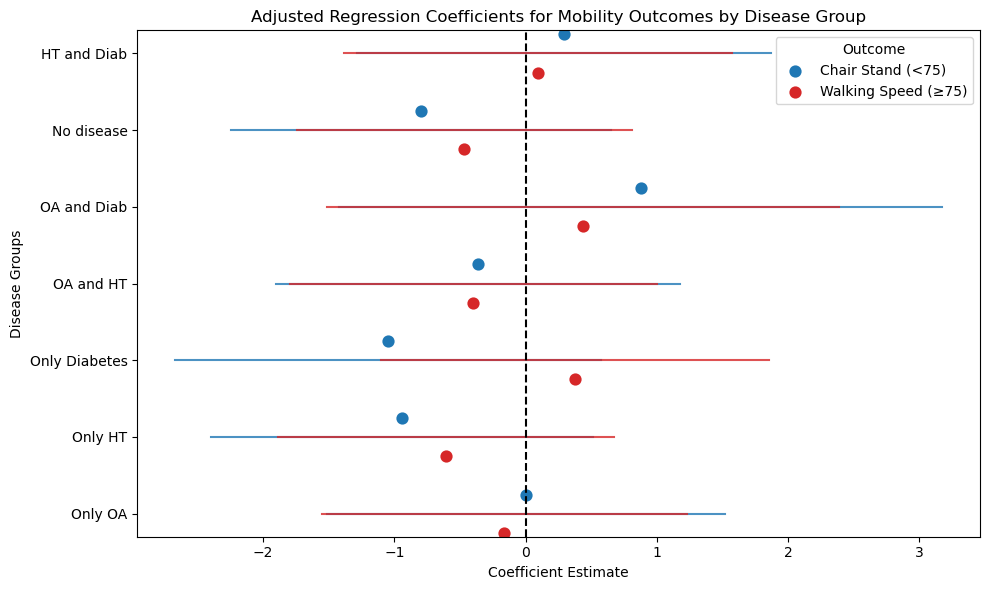

                                          predictor      coef  ci_lower  \
C(disease_category)[T.HT and Diab]      HT and Diab  0.289782 -1.286063   
C(disease_category)[T.No disease]        No disease -0.796041 -2.243494   
C(disease_category)[T.OA and Diab]      OA and Diab  0.875309 -1.418784   
C(disease_category)[T.OA and HT]          OA and HT -0.362686 -1.903656   
C(disease_category)[T.Only Diabetes]  Only Diabetes -1.046655 -2.667421   
C(disease_category)[T.Only HT]              Only HT -0.942517 -2.397771   
C(disease_category)[T.Only OA]              Only OA  0.005618 -1.510667   
C(disease_category)[T.HT and Diab]      HT and Diab  0.094593 -1.380397   
C(disease_category)[T.No disease]        No disease -0.466114 -1.738867   
C(disease_category)[T.OA and Diab]      OA and Diab  0.439309 -1.510844   
C(disease_category)[T.OA and HT]          OA and HT -0.397425 -1.793766   
C(disease_category)[T.Only Diabetes]  Only Diabetes  0.376384 -1.102397   
C(disease_category)[T.Onl

In [34]:
df_1 = plot_mobility_regression_coeffs_fixed(maxchair, maxwalk)
print(df_1)